In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [6]:
data=pd.read_csv('Data/train_XnW6LSF.csv')
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: xlabel='Outlet_Size', ylabel='count'>

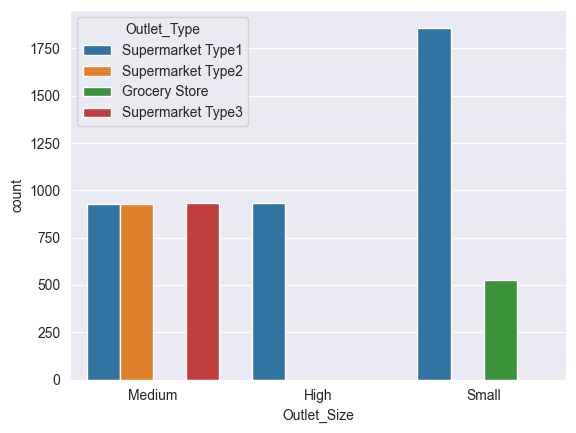

In [8]:
sns.countplot(x='Outlet_Size',data=data,hue='Outlet_Type')

## Changing catagorical Values

In [9]:
#As we have only two type of fat content with the different name,willa siign lf,lowfat & Low Fat will be 0,and reg&regular will be 1
data['Item_Fat_Content']=data['Item_Fat_Content'].map({'Low Fat':0,'LF':0,'low fat':0,'Regular':1,'reg':1})
data['Item_Type']=data['Item_Type'].map({'Baking Goods':0,'Canned':1,'Dairy':2,'Frozen Foods':3,'Fruits and Vegetables':4,
                                         'Health and Hygiene':5,'Household':6,'Meat':7,'Snack Foods':8,'Soft Drinks':9})
data['Outlet_Size']=data['Outlet_Size'].map({'High':0,'Medium':1,'Small':2,'12.857645184135976':1})
data['Outlet_Location_Type']=data['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})
data['Outlet_Type']=data['Outlet_Type'].map({'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3})
#for outlet and item identifier i will be using label encoder it will be easy for many rows
## Using label encoder to convert the categorical data to numerical data 
lc=LabelEncoder()
data['Outlet_Identifier']=lc.fit_transform(data.Outlet_Identifier)
data['Item_Identifier']=lc.fit_transform(data.Item_Identifier)


## Filling missing values

In [10]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                     956
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
data.fillna(data['Item_Weight'].mean(),inplace=True)
#As we have all of them in medium stores so we  fill the NAN value with Medium
data.loc[data['Outlet_Size'].isnull()==True,'Outlet_Size']=1.0

In [12]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,2.0,249.8092,9,1999,1.000000,0,1,3735.1380
1,8,5.920,1,0.019278,9.0,48.2692,3,2009,1.000000,2,2,443.4228
2,662,17.500,0,0.016760,7.0,141.6180,9,1999,1.000000,0,1,2097.2700
3,1121,19.200,1,0.000000,4.0,182.0950,0,1998,12.857645,2,0,732.3800
4,1297,8.930,0,0.000000,6.0,53.8614,1,1987,0.000000,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,8.0,214.5218,1,1987,0.000000,2,1,2778.3834
8519,897,8.380,1,0.046982,0.0,108.1570,7,2002,12.857645,1,1,549.2850
8520,1357,10.600,0,0.035186,5.0,85.1224,6,2004,2.000000,1,1,1193.1136
8521,681,7.210,1,0.145221,8.0,103.1332,3,2009,1.000000,2,2,1845.5976


In [13]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,2.0,249.8092,9,1999,1.000000,0,1,3735.1380
1,8,5.920,1,0.019278,9.0,48.2692,3,2009,1.000000,2,2,443.4228
2,662,17.500,0,0.016760,7.0,141.6180,9,1999,1.000000,0,1,2097.2700
3,1121,19.200,1,0.000000,4.0,182.0950,0,1998,12.857645,2,0,732.3800
4,1297,8.930,0,0.000000,6.0,53.8614,1,1987,0.000000,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,8.0,214.5218,1,1987,0.000000,2,1,2778.3834
8519,897,8.380,1,0.046982,0.0,108.1570,7,2002,12.857645,1,1,549.2850
8520,1357,10.600,0,0.035186,5.0,85.1224,6,2004,2.000000,1,1,1193.1136
8521,681,7.210,1,0.145221,8.0,103.1332,3,2009,1.000000,2,2,1845.5976


## Bringing all the values to 0 to 1 
 # X=(X-Xmin)/(Xmax-Xmin)

In [14]:
for i in data.columns[1:]:
    data[i]=(data[i]-data[i].min())/(data[i].max()-data[i].min())

In [15]:
data['Item_Identifier']=data.Item_Identifier.astype(float)

In [16]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,0.282525,0.0,0.048866,0.155549,0.927507,1.000000,0.583333,0.077775,0.0,0.333333,0.283587
1,8.0,0.081274,1.0,0.058705,0.699973,0.072068,0.333333,1.000000,0.077775,1.0,0.666667,0.031419
2,662.0,0.770765,0.0,0.051037,0.544423,0.468288,1.000000,0.583333,0.077775,0.0,0.333333,0.158115
3,1121.0,0.871986,1.0,0.000000,0.311099,0.640093,0.000000,0.541667,1.000000,1.0,0.000000,0.053555
4,1297.0,0.260494,0.0,0.000000,0.466648,0.095805,0.111111,0.083333,0.000000,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,0.137541,0.0,0.172914,0.622198,0.777729,0.111111,0.083333,0.000000,1.0,0.333333,0.210293
8519,897.0,0.227746,1.0,0.143069,0.000000,0.326263,0.777778,0.708333,1.000000,0.5,0.333333,0.039529
8520,1357.0,0.359929,0.0,0.107148,0.388874,0.228492,0.666667,0.791667,0.155549,0.5,0.333333,0.088850
8521,681.0,0.158083,1.0,0.442219,0.622198,0.304939,0.333333,1.000000,0.077775,1.0,0.666667,0.138835


In [17]:
data=data.drop('Item_Identifier',axis=1)

In [18]:
#separeting item Outlet sales
# storing all the independent variables as X
#Removing the Loan_ID colum which is not needed
X=data.drop('Item_Outlet_Sales',axis=1)
#storing target value
y=data['Item_Outlet_Sales']

In [19]:
X.shape,y.shape

((8523, 10), (8523,))

In [20]:
y

0       0.283587
1       0.031419
2       0.158115
3       0.053555
4       0.073651
          ...   
8518    0.210293
8519    0.039529
8520    0.088850
8521    0.138835
8522    0.056105
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## Creating Traing and Validation set

In [21]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=10)
print(X.shape,X_train.shape,X_test.shape)

(8523, 10) (6818, 10) (1705, 10)


In [22]:
X.shape

(8523, 10)

## Defining the architecture model

In [23]:
from keras import Sequential
from keras.layers import InputLayer,Dense
input_neurons=X.shape[1]
#Since its a hyperparameter model we can pick the hidden layers and hidden neurons on our own
#Defining the hidden layer
number_of_hidden_layers=2
neurons_hidden_layers_1=10
neurons_hidden_layers_2=5
#Since Loan Prediction model is aq binary classification so we define the output layer =1
output_neurons = 1

## Activating Model

In [24]:
model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neurons_hidden_layers_1,activation='relu'))
model.add(Dense(units=neurons_hidden_layers_2,activation='relu'))
model.add(Dense(units=output_neurons,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


## Compailing the model (Define loss function and optimiser)

In [26]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

# Trainig the model

In [27]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process
model_history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=75)

Epoch 1/75
214/214 [==============================] - 7s 12ms/step - loss: 0.4995 - accuracy: 1.4667e-04 - val_loss: 0.4514 - val_accuracy: 5.8651e-04
Epoch 2/75
214/214 [==============================] - 2s 10ms/step - loss: 0.4405 - accuracy: 1.4667e-04 - val_loss: 0.4343 - val_accuracy: 5.8651e-04
Epoch 3/75
214/214 [==============================] - 2s 9ms/step - loss: 0.4266 - accuracy: 1.4667e-04 - val_loss: 0.4231 - val_accuracy: 5.8651e-04
Epoch 4/75
214/214 [==============================] - 2s 10ms/step - loss: 0.4181 - accuracy: 1.4667e-04 - val_loss: 0.4179 - val_accuracy: 5.8651e-04
Epoch 5/75
214/214 [==============================] - 2s 8ms/step - loss: 0.4140 - accuracy: 1.4667e-04 - val_loss: 0.4152 - val_accuracy: 5.8651e-04
Epoch 6/75
214/214 [==============================] - 2s 7ms/step - loss: 0.4121 - accuracy: 1.4667e-04 - val_loss: 0.4139 - val_accuracy: 5.8651e-04
Epoch 7/75
214/214 [==============================] - 2s 7ms/step - loss: 0.4110 - accuracy: 1.46

## Evaluating the performance

In [28]:
# getting predictions for the validation set
predictions=model.predict(X_test)

54/54 [==============================] - 0s 3ms/step


In [29]:
# calculating the accuracy on validation set
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.006749256477129458


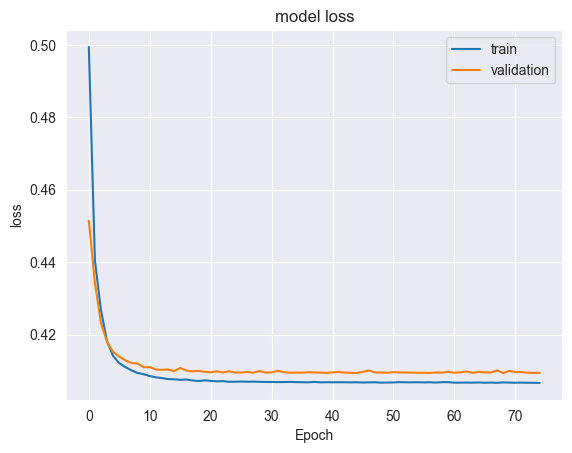

In [30]:
#summarise the history
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='upper right')
plt.show()


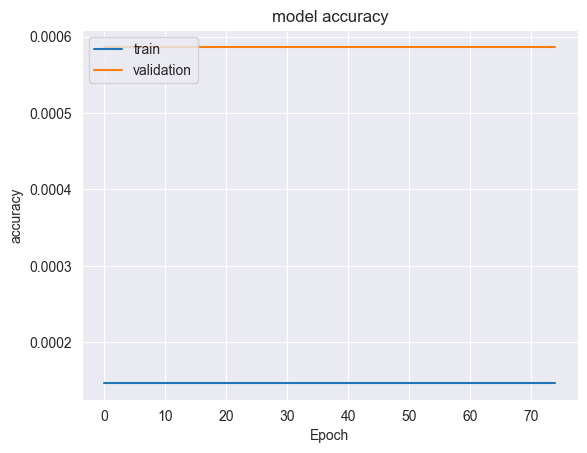

In [31]:
#summarise the history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [32]:
test=pd.read_csv('Data/test_FewQE9B.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
